## Bibliotecas Usadas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

## Hiperparâmetros e constantes

In [2]:
a = 0.5
err = 0.000001
limit = 50000
random.seed(7)

## Leitura dos dados

A função abaixo abre os arquivos onde estão salvos os dados e os salva em três listas de features.

In [3]:
def readData(path):
    try:
        f = open(path)
    except:
        print("Houston we've got a file problem")
        return
    dataset = [[],[],[]]
    for i in f:
        stringList = i.split()
        try:
            for j in range(len(dataset)):
                if j < len(stringList):
                    dataset[j].append(float(stringList[j]))
                else:
                    f.close()
                    return
        except ValueError:
            print("You had a Value Error")
            f.close()
            return
        except:
            print("You got another Error")
            f.close()
            return
    f.close()
    return dataset

Esta função separa os dados em conjunto de treino e conjunto de teste.

In [4]:
def splitData(dataset):
    trainset = [0,1,2]
    testset = [0,1,2]
    trainset[0], testset[0], trainset[1], testset[1], trainset[2], testset[2] = train_test_split(dataset[0], dataset[1], dataset[2], test_size=0.1, random_state=7)
    return trainset, testset

## Plotando gráficos

Estas funções peegam os pontos originais e os pontos produzidos pela regressão e produzem o gráfico, com uma parte em verde que representa a área onde o robô pode defender.

In [7]:
def plotPoints(dataset):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    X, Y =  np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2,2))
    Z =  np.zeros(X.shape)
    ax.plot_surface(X, Y, Z, shade=False, color="g", alpha=.4)
    ax.plot([-2.5, -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir='z', zs=0, c='g')
    ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir='z', zs=0, c='g')
    ax.scatter(dataset[0],dataset[1],dataset[2])
    return ax

In [8]:
def plotPolynom(dataset,X,Y,Z):
    ax = plotPoints(dataset)
    ax.plot(X,Y,Z)

## Conseguindo Pontos de entrada

A nossa regressão é feita a partir do tempo, para cada dimensão é obtido um polinômio a partir do tempo.

In [9]:
def gettingX(start,end,step):
    lengh = end - start + step
    numb = int(lengh/step)
    x = np.linspace(start,end,num = numb)
    return x

# Regressão Linear

Regressão linear com base em gradiente descendente, são usados dois mecanismos de parada, é calculada a variação de um passo para o outro, se ele for percentualmente menor que um valor pré determinado, ele para, o outro é o número de épocas, se ele passar de um limite pré determinado, o algoritmo para.

In [10]:
def linearRegression(a,x,y,theta,err):
    epoch = 0
    difference = 50
    prevJ = j(linearH,theta,x,y)
    while(difference > err):
        if (epoch > limit):
            break
        temp0 = theta[0] - a*derivative0(linearH,theta,x,y)
        temp1 = theta[1] - a*derivative1(linearH,theta,x,y)
        theta[0] = temp0
        theta[1] = temp1
        nowJ = j(linearH,theta,x,y)
        dif = abs(nowJ - prevJ)
        difference = dif/prevJ
        epoch += 1
        prevJ = nowJ
    print(epoch)
    print(j(linearH,theta,x,y))
    pass

In [11]:
def j(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += math.pow(h(theta,x[i]) - y[i],2)
    return summ/(2*length)

In [12]:
def linearH(theta,x):
    return theta[0] + theta[1]*x

In [13]:
def derivative0(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += h(theta,x[i]) - y[i]
    return summ/length

In [14]:
def derivative1(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += (h(theta,x[i]) - y[i])*x[i]
    return summ/length

## Regressão Polinomial

É uma extensão da regressão linear para polinômios de qualquer grau, a derivada utilizada é dada pela fórmula:  
![derivative](../image/derivative.png)  
**Imagem 1:** Derivada da função de custo geral da regressão polinomial. 

Essa fórmula é válida para j >= 1, para j = 0, é válida a mesma derivada do caso linear.

Para facilitar o cálculo e comparação do erro, foi escolhido apenas o número de épocas como limite de parada aqui. 

In [15]:
def generalH(theta,x):
    summ = 0
    for i in range(len(theta)):
        summ += theta[i]*pow(x,i)
    return summ

In [16]:
def derivative(h,theta,x,y,grau):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += (h(theta,x[i]) - y[i])*pow(x[i],grau)
    return summ/length

In [17]:
def polynomialRegression(a,x,y,theta,err,grau):
    epoch = 0
    while(epoch < limit):
        temp = [0]*(grau+1)
        temp[0] = theta[0] - a*derivative0(generalH,theta,x,y)
        for i in range(1,grau+1):
            temp[i] = theta[i] - a*derivative(generalH,theta,x,y,i)
        for i in range(len(temp)):
            theta[i] = temp[i]
        epoch += 1
    print(epoch)
    print(j(generalH,theta,x,y))
    pass

## Erro

As funções de erro escolhidas foram a raiz do erro quadrático médio, que produz um resultado similar ao erro quadrático médio, porém na mesma ordem de grandeza dos dados e o erro quadrático relativo, que é uma taxa é bom tê-la para comparar os dados.

In [18]:
def mse(ye,y):
    lengh = len(y)
    summ = 0
    for i in range(lengh):
        summ += pow(ye[i] - y[i], 2)
    result = summ/lengh
    return result

In [19]:
def rmse(ye,y):
    result = math.sqrt(mse(ye,y))
    return result

In [20]:
def rse(ye,y):
    mean = np.mean(y)
    summ = 0
    summ2 = 0
    lengh = len(y)
    for i in range(lengh):
        summ += pow(y[i] - mean, 2)
        summ2 += pow(ye[i] - y[i], 2)
    result = summ2/summ
    return result

## Execução

### Aquisição dos dados

Neste ponto é iniciada a execução do projeto, começando por ler os dados e imprimi-los.

In [21]:
dataset = readData("../data/kick1.dat")
print(dataset)

[[-0.21, -0.305, -0.368, -0.37, -0.48, -0.532, -0.575, -0.583, -0.618, -0.702, -0.783, -0.842, -0.882, -0.93, -0.969, -0.989, -1.032, -1.088, -1.104, -1.192], [2.048, 1.999, 1.968, 1.902, 1.841, 1.807, 1.733, 1.69, 1.649, 1.611, 1.568, 1.523, 1.438, 1.408, 1.34, 1.295, 1.244, 1.201, 1.159, 1.109], [0.145, 0.103, 0.149, 0.11, 0.135, 0.111, 0.12, 0.111, 0.108, 0.117, 0.107, 0.104, 0.139, 0.142, 0.111, 0.107, 0.118, 0.119, 0.126, 0.11]]


In [22]:
dataset2 = readData("../data/kick2.dat")
print(dataset2)

[[-0.105, -0.162, -0.184, -0.185, -0.23, -0.266, -0.287, -0.311, -0.309, -0.331, -0.391, -0.431, -0.441, -0.445, -0.484, -0.514, -0.516, -0.524, -0.552, -0.596], [2.048, 1.999, 1.968, 1.902, 1.841, 1.807, 1.733, 1.69, 1.649, 1.611, 1.568, 1.523, 1.438, 1.408, 1.34, 1.295, 1.244, 1.201, 1.159, 1.109], [0.145, 0.177, 0.172, 0.167, 0.192, 0.219, 0.213, 0.223, 0.25, 0.244, 0.233, 0.269, 0.283, 0.29, 0.263, 0.29, 0.28, 0.281, 0.296, 0.269]]


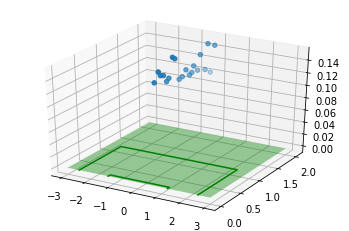

In [23]:
plotPoints(dataset)

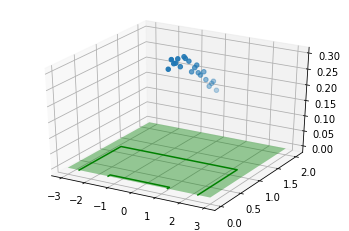

In [24]:
plotPoints(dataset2)

In [25]:
x = gettingX(1/60,1/3,1/60)
print(len(x))

20


### Regressão Linear

Então é feita uma regressão linear nos dois datasets, a taxa de aprendizado utilizada é 0.5, o limite de épocas é 50000 e a diferença percentual de parada é 0.0001%.

In [27]:
thetaX = [random.random(),random.random()]
linearRegression(a,x,dataset[0],thetaX,err)

1539
0.0003586952739931634


In [28]:
thetaY = [random.random(),random.random()]
linearRegression(a,x,dataset[1],thetaY,err)

1764
5.7394282324824956e-05


In [29]:
thetaZ = [random.random(),random.random()]
linearRegression(a,x,dataset[2],thetaZ,err)

1186
9.72862147170852e-05


In [30]:
Xline = []
Yline = []
Zline = []
for i in x:
    Xline.append(linearH(thetaX,i))
    Yline.append(linearH(thetaY,i))
    Zline.append(linearH(thetaZ,i))

In [31]:
print(thetaX)
print(thetaY)
print(thetaZ)

[-0.2078600864702032, -2.9705403100271814]
[2.10021958696311, -2.9918367948518774]
[0.12450987015214016, -0.028070176475092305]


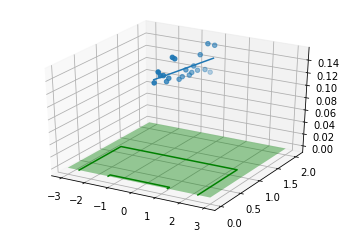

In [32]:
plotPolynom(dataset,Xline,Yline,Zline)

In [187]:
thetaX2 = [random.uniform(-1,1),random.uniform(-1,1)]
linearRegression(a,x,dataset2[0],thetaX2,err)

1413
0.00012340579051417288


In [188]:
thetaY2 = [random.uniform(0,2),random.uniform(0,2)]
linearRegression(a,x,dataset2[1],thetaY2,err)

1788
5.739429568713172e-05


In [189]:
thetaZ2 = [random.random(),random.random()]
linearRegression(a,x,dataset2[2],thetaZ2,err)

1174
0.00014601108014919726


In [190]:
Xline2 = []
Yline2 = []
Zline2 = []
for i in x:
    Xline2.append(linearH(thetaX2,i))
    Yline2.append(linearH(thetaY2,i))
    Zline2.append(linearH(thetaZ2,i))

In [191]:
print(Xline2)

[-0.13040268544479636, -0.15490795137805735, -0.17941321731131837, -0.20391848324457937, -0.22842374917784036, -0.2529290151111014, -0.27743428104436235, -0.3019395469776234, -0.3264448129108844, -0.35095007884414536, -0.3754553447774064, -0.3999606107106674, -0.42446587664392843, -0.4489711425771894, -0.4734764085104504, -0.49798167444371144, -0.5224869403769724, -0.5469922063102334, -0.5714974722434943, -0.5960027381767554]


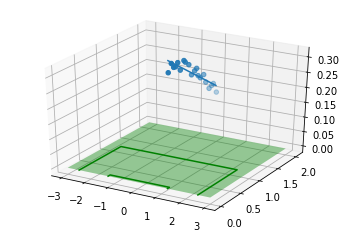

In [192]:
plotPolynom(dataset2,Xline2,Yline2,Zline2)

É possível perceber que a regressão linear consegue convergir bem antes de atingir as 50000 épocas, o erro será analisado e discutido posteriormente.

### Regressão Polinomial

Para a regressão polinomial são usados os mesmos hiperparâmetros, com excessão da diferença, que não é mais usada aqui.

In [39]:
grau = 1
thetaXg1 = []
for i in range(grau+1):
    thetaXg1.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg1,err,grau)

50000
0.00035865552631578895


In [40]:
grau = 1
thetaYg1 = []
for i in range(grau+1):
    thetaYg1.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg1,err,grau)

50000
5.738795112781932e-05


In [41]:
grau = 1
thetaZg1 = []
for i in range(grau+1):
    thetaZg1.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg1,err,grau)

50000
9.727548872180453e-05


In [42]:
Xlineg1 = []
Ylineg1 = []
Zlineg1 = []
for i in x:
    Xlineg1.append(generalH(thetaXg1,i))
    Ylineg1.append(generalH(thetaYg1,i))
    Zlineg1.append(generalH(thetaZg1,i))

In [43]:
print(thetaXg1)
print(thetaYg1)
print(thetaZg1)

[-0.20734210526316632, -2.9734736842104783]
[2.1004263157894636, -2.9930075187969374]
[0.12477894736842093, -0.02959398496240541]


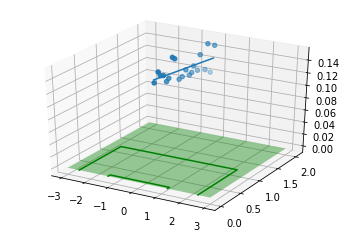

In [44]:
plotPolynom(dataset,Xlineg1,Ylineg1,Zlineg1)

In [45]:
grau = 2
thetaXg2 = []
for i in range(grau+1):
    thetaXg2.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg2,err,grau)

50000
0.00026377251098927916


In [46]:
grau = 2
thetaYg2 = []
for i in range(grau+1):
    thetaYg2.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg2,err,grau)

50000
5.9126520726327715e-05


In [47]:
grau = 2
thetaZg2 = []
for i in range(grau+1):
    thetaZg2.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg2,err,grau)

50000
9.24188510259078e-05


In [48]:
Xlineg2 = []
Ylineg2 = []
Zlineg2 = []
for i in x:
    Xlineg2.append(generalH(thetaXg2,i))
    Ylineg2.append(generalH(thetaYg2,i))
    Zlineg2.append(generalH(thetaZg2,i))

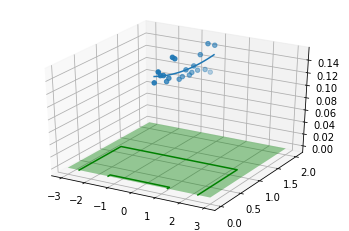

In [49]:
plotPolynom(dataset,Xlineg2,Ylineg2,Zlineg2)

In [50]:
grau = 5
thetaXg5 = []
for i in range(grau+1):
    thetaXg5.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg5,err,grau)

50000
0.0002618781940436772


In [51]:
grau = 5
thetaYg5 = []
for i in range(grau+1):
    thetaYg5.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg5,err,grau)

50000
5.699893633168397e-05


In [52]:
grau = 5
thetaZg5 = []
for i in range(grau+1):
    thetaZg5.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg5,err,grau)

50000
9.517403112223925e-05


In [53]:
Xlineg5 = []
Ylineg5 = []
Zlineg5 = []
for i in x:
    Xlineg5.append(generalH(thetaXg5,i))
    Ylineg5.append(generalH(thetaYg5,i))
    Zlineg5.append(generalH(thetaZg5,i))

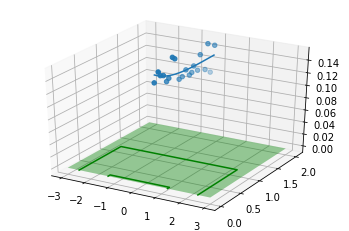

In [54]:
plotPolynom(dataset,Xlineg5,Ylineg5,Zlineg5)

In [55]:
grau = 10
thetaXg10 = []
for i in range(grau+1):
    thetaXg10.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg10,err,grau)

50000
0.0002609288352398164


In [56]:
print(thetaXg10)

[-0.1787434087429464, -3.4121243869657225, 0.9900859787517777, 0.8519305607335381, -0.23093716743257592, 1.0356697802990598, -0.737357886884381, -0.1549427683644666, 0.5171068694532459, -0.695147205236532, -0.021802247815964702]


In [57]:
grau = 10
thetaYg10 = []
for i in range(grau+1):
    thetaYg10.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg10,err,grau)

50000
5.698032084496585e-05


In [58]:
grau = 10
thetaZg10 = []
for i in range(grau+1):
    thetaZg10.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg10,err,grau)

50000
9.408116607210263e-05


In [142]:
Xlineg10 = []
Ylineg10 = []
Zlineg10 = []
for i in x:
    Xlineg10.append(generalH(thetaXg10,i))
    Ylineg10.append(generalH(thetaYg10,i))
    Zlineg10.append(generalH(thetaZg10,i))

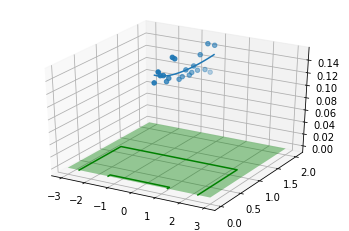

In [195]:
plotPolynom(dataset,Xlineg10,Ylineg10,Zlineg10)

Para grau um, a regressão polinomial é a mesma que a regressão linear, obtendo um resultado semelhante, para os outros todos produzem uma curva que no espaço dos pontos produz uma curva próxima de uma reta, mostrando que para esse primeiro chute, a reta é uma boa aproximação. O erros serão discutidos posteriormente.

In [61]:
grau = 1
theta2Xg1 = []
for i in range(grau+1):
    theta2Xg1.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg1,err,grau)

50000
0.00012339221804511275


In [62]:
grau = 1
theta2Yg1 = []
for i in range(grau+1):
    theta2Yg1.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg1,err,grau)

50000
5.738795112781932e-05


In [63]:
grau = 1
theta2Zg1 = []
for i in range(grau+1):
    theta2Zg1.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg1,err,grau)

50000
0.00014599499999999987


In [64]:
Xline2g1 = []
Yline2g1 = []
Zline2g1 = []
for i in x:
    Xline2g1.append(generalH(theta2Xg1,i))
    Yline2g1.append(generalH(theta2Yg1,i))
    Zline2g1.append(generalH(theta2Zg1,i))

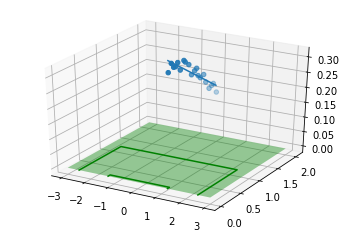

In [65]:
plotPolynom(dataset2,Xline2g1,Yline2g1,Zline2g1)

In [66]:
grau = 1
theta2Xg2 = []
for i in range(grau+1):
    theta2Xg2.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg2,err,grau)

50000
0.00012339221804511275


In [67]:
grau = 1
theta2Yg2 = []
for i in range(grau+1):
    theta2Yg2.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg2,err,grau)

50000
5.738795112781932e-05


In [68]:
grau = 2
theta2Zg2 = []
for i in range(grau+1):
    theta2Zg2.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg2,err,grau)

50000
7.703112204792111e-05


In [69]:
Xline2g2 = []
Yline2g2 = []
Zline2g2 = []
for i in x:
    Xline2g2.append(generalH(theta2Xg2,i))
    Yline2g2.append(generalH(theta2Yg2,i))
    Zline2g2.append(generalH(theta2Zg2,i))

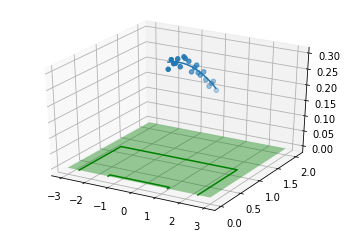

In [70]:
plotPolynom(dataset2,Xline2g2,Yline2g2,Zline2g2)

In [71]:
grau = 2
theta2Xg2t = []
for i in range(grau+1):
    theta2Xg2t.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg2t,err,grau)

50000
0.0001014135853566472


In [72]:
grau = 2
theta2Yg2t = []
for i in range(grau+1):
    theta2Yg2t.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg2t,err,grau)

50000
5.794869041426344e-05


In [73]:
grau = 2
theta2Zg2t = []
for i in range(grau+1):
    theta2Zg2t.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg2t,err,grau)

50000
7.416560855323174e-05


In [74]:
Xline2g2t = []
Yline2g2t = []
Zline2g2t = []
for i in x:
    Xline2g2t.append(generalH(theta2Xg2t,i))
    Yline2g2t.append(generalH(theta2Yg2t,i))
    Zline2g2t.append(generalH(theta2Zg2t,i))

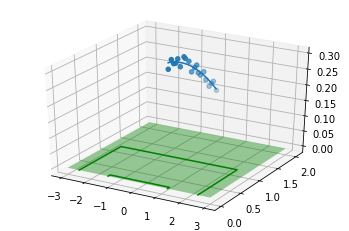

In [75]:
plotPolynom(dataset2,Xline2g2t,Yline2g2t,Zline2g2t)

Para esse chute, percebeu-se que a única dimensão que varia polinomialmente é z, então produzimos um gráfico para mostrar que fazendo a regressão com grau maior em todas as dimensões, ou a regressão linear para x e y e polinomial para z produzem resultados semelhantes.

In [76]:
grau = 1
theta2Xg5 = []
for i in range(grau+1):
    theta2Xg5.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg5,err,grau)

50000
0.00012339221804511275


In [77]:
grau = 1
theta2Yg5 = []
for i in range(grau+1):
    theta2Yg5.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg5,err,grau)

50000
5.738795112781932e-05


In [78]:
grau = 5
theta2Zg5 = []
for i in range(grau+1):
    theta2Zg5.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg5,err,grau)

50000
7.21426958729792e-05


In [193]:
Xline2g5 = []
Yline2g5 = []
Zline2g5 = []
for i in x:
    Xline2g5.append(generalH(theta2Xg5,i))
    Yline2g5.append(generalH(theta2Yg5,i))
    Zline2g5.append(generalH(theta2Zg5,i))

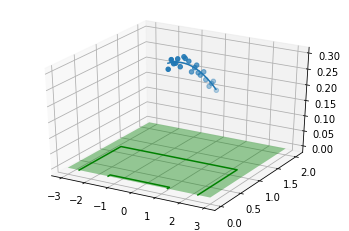

In [194]:
plotPolynom(dataset2,Xline2g5,Yline2g5,Zline2g5)

In [82]:
grau = 1
theta2Xg10 = []
for i in range(grau+1):
    theta2Xg10.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg10,err,grau)

50000
0.00012339221804511275


In [83]:
grau = 1
theta2Yg10 = []
for i in range(grau+1):
    theta2Yg10.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg10,err,grau)

50000
5.738795112781932e-05


In [84]:
grau = 10
theta2Zg10 = []
for i in range(grau+1):
    theta2Zg10.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg10,err,grau)

50000
7.640167063854112e-05


In [144]:
Xline2g10 = []
Yline2g10 = []
Zline2g10 = []
for i in x:
    Xline2g10.append(generalH(theta2Xg10,i))
    Yline2g10.append(generalH(theta2Yg10,i))
    Zline2g10.append(generalH(theta2Zg10,i))

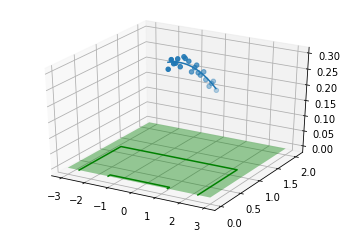

In [196]:
plotPolynom(dataset2,Xline2g10,Yline2g10,Zline2g10)

Aqui percebe-se que polinômios de grau maior produzem uma curva semelhante a uma parábola na região dos pontos, o que pode se der pela pequena quantidade de pontos, mas mostra que a parábola é uma boa representação desta trajetória. As diferenças entre os polinômios de grau superior, estão majoritariamente numa região do espaço fora dos pontos dados, então não está sendo mostrada, mas existe, como mostrado abaixo.

In [197]:
x2 = gettingX(1/60,3/4,1/60)

In [198]:
Xline2g10b = []
Yline2g10b = []
Zline2g10b = []
for i in x2:
    Xline2g10b.append(generalH(theta2Xg10,i))
    Yline2g10b.append(generalH(theta2Yg10,i))
    Zline2g10b.append(generalH(theta2Zg10,i))

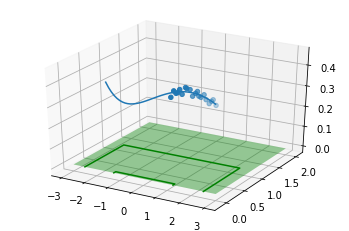

In [199]:
plotPolynom(dataset2,Xline2g10b,Yline2g10b,Zline2g10b)

### Variando a taxa de aprendizado

Aqui testou-se variar a taxa de aprendizado para verificar seu efeito sobre os resultados. Os erros serão discutidos posteriormente. As taxas utilizadas foram: 0.001, 0.01, 0.1, 1 e 2. Testou-se com a regressão linear (polinomial de grau 1) para o primeiro chute, e polinomial de grau 2 para o segundo, curvas que se mostraram adequadas para a representação da trajetória.

In [205]:
grau = 1
thetaXg1a1 = []
for i in range(grau+1):
    thetaXg1a1.append(random.uniform(-1,1))
polynomialRegression(0.001,x,dataset[0],thetaXg1a1,err,grau)

50000
0.02011184517116753


In [206]:
grau = 1
thetaYg1a1 = []
for i in range(grau+1):
    thetaYg1a1.append(random.uniform(0,2))
polynomialRegression(0.001,x,dataset[1],thetaYg1a1,err,grau)

50000
0.02243357181456023


In [207]:
grau = 1
thetaZg1a1 = []
for i in range(grau+1):
    thetaZg1a1.append(random.random())
polynomialRegression(0.001,x,dataset[2],thetaZg1a1,err,grau)

50000
0.0002035488786026678


In [208]:
Xlineg1a1 = []
Ylineg1a1 = []
Zlineg1a1 = []
for i in x:
    Xlineg1a1.append(generalH(thetaXg1a1,i))
    Ylineg1a1.append(generalH(thetaYg1a1,i))
    Zlineg1a1.append(generalH(thetaZg1a1,i))

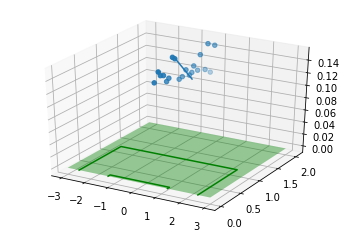

In [209]:
plotPolynom(dataset,Xlineg1a1,Ylineg1a1,Zlineg1a1)

In [200]:
grau = 1
theta2Xg2a1 = []
for i in range(grau+1):
    theta2Xg2a1.append(random.uniform(-1,1))
polynomialRegression(0.001,x,dataset2[0],theta2Xg2a1,err,grau)

50000
0.0030841488479121286


In [201]:
grau = 1
theta2Yg2a1 = []
for i in range(grau+1):
    theta2Yg2a1.append(random.uniform(0,2))
polynomialRegression(0.001,x,dataset2[1],theta2Yg2a1,err,grau)

50000
0.039777123915551015


In [202]:
grau = 2
theta2Zg2a1 = []
for i in range(grau+1):
    theta2Zg2a1.append(random.random())
polynomialRegression(0.001,x,dataset2[2],theta2Zg2a1,err,grau)

50000
0.0007320158973188386


In [203]:
Xline2g2a1 = []
Yline2g2a1 = []
Zline2g2a1 = []
for i in x:
    Xline2g2a1.append(generalH(theta2Xg2a1,i))
    Yline2g2a1.append(generalH(theta2Yg2a1,i))
    Zline2g2a1.append(generalH(theta2Zg2a1,i))

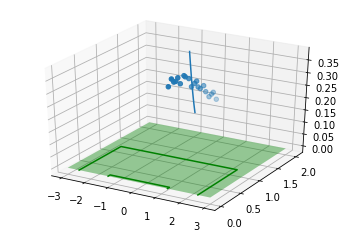

In [204]:
plotPolynom(dataset2,Xline2g2a1,Yline2g2a1,Zline2g2a1)

In [97]:
grau = 1
thetaXg1a2 = []
for i in range(grau+1):
    thetaXg1a2.append(random.uniform(-1,1))
polynomialRegression(0.01,x,dataset[0],thetaXg1a2,err,grau)

50000
0.00036278257156126015


In [98]:
grau = 1
thetaYg1a2 = []
for i in range(grau+1):
    thetaYg1a2.append(random.uniform(0,2))
polynomialRegression(0.01,x,dataset[1],thetaYg1a2,err,grau)

50000
6.415160284020133e-05


In [99]:
grau = 1
thetaZg1a2 = []
for i in range(grau+1):
    thetaZg1a2.append(random.random())
polynomialRegression(0.01,x,dataset[2],thetaZg1a2,err,grau)

50000
9.772243243223752e-05


In [100]:
Xlineg1a2 = []
Ylineg1a2 = []
Zlineg1a2 = []
for i in x:
    Xlineg1a2.append(generalH(thetaXg1a2,i))
    Ylineg1a2.append(generalH(thetaYg1a2,i))
    Zlineg1a2.append(generalH(thetaZg1a2,i))

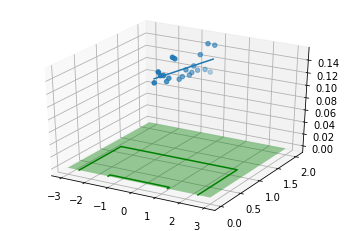

In [101]:
plotPolynom(dataset,Xlineg1a2,Ylineg1a2,Zlineg1a2)

In [102]:
grau = 1
theta2Xg2a2 = []
for i in range(grau+1):
    theta2Xg2a2.append(random.uniform(-1,1))
polynomialRegression(0.01,x,dataset2[0],theta2Xg2a2,err,grau)

50000
0.00012453854805830023


In [103]:
grau = 1
theta2Yg2a2 = []
for i in range(grau+1):
    theta2Yg2a2.append(random.uniform(0,2))
polynomialRegression(0.01,x,dataset2[1],theta2Yg2a2,err,grau)

50000
6.437479883722446e-05


In [104]:
grau = 2
theta2Zg2a2 = []
for i in range(grau+1):
    theta2Zg2a2.append(random.random())
polynomialRegression(0.01,x,dataset2[2],theta2Zg2a2,err,grau)

50000
0.00023762788042716473


In [105]:
Xline2g2a2 = []
Yline2g2a2 = []
Zline2g2a2 = []
for i in x:
    Xline2g2a2.append(generalH(theta2Xg2a2,i))
    Yline2g2a2.append(generalH(theta2Yg2a2,i))
    Zline2g2a2.append(generalH(theta2Zg2a2,i))

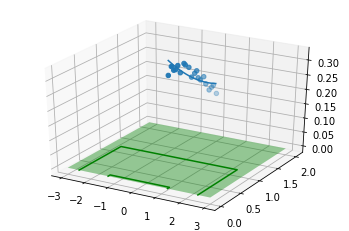

In [106]:
plotPolynom(dataset2,Xline2g2a2,Yline2g2a2,Zline2g2a2)

In [107]:
grau = 1
thetaXg1a3 = []
for i in range(grau+1):
    thetaXg1a3.append(random.uniform(-1,1))
polynomialRegression(0.1,x,dataset[0],thetaXg1a3,err,grau)

50000
0.00035865552631578917


In [108]:
grau = 1
thetaYg1a3 = []
for i in range(grau+1):
    thetaYg1a3.append(random.uniform(0,2))
polynomialRegression(0.1,x,dataset[1],thetaYg1a3,err,grau)

50000
5.7387951127819284e-05


In [109]:
grau = 1
thetaZg1a3 = []
for i in range(grau+1):
    thetaZg1a3.append(random.random())
polynomialRegression(0.1,x,dataset[2],thetaZg1a3,err,grau)

50000
9.727548872180451e-05


In [110]:
Xlineg1a3 = []
Ylineg1a3 = []
Zlineg1a3 = []
for i in x:
    Xlineg1a3.append(generalH(thetaXg1a2,i))
    Ylineg1a3.append(generalH(thetaYg1a2,i))
    Zlineg1a3.append(generalH(thetaZg1a2,i))

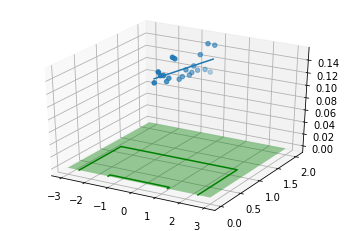

In [111]:
plotPolynom(dataset,Xlineg1a3,Ylineg1a3,Zlineg1a3)

In [112]:
grau = 1
theta2Xg2a3 = []
for i in range(grau+1):
    theta2Xg2a3.append(random.uniform(-1,1))
polynomialRegression(0.1,x,dataset2[0],theta2Xg2a3,err,grau)

50000
0.00012339221804511273


In [113]:
grau = 1
theta2Yg2a3 = []
for i in range(grau+1):
    theta2Yg2a3.append(random.uniform(0,2))
polynomialRegression(0.1,x,dataset2[1],theta2Yg2a3,err,grau)

50000
5.7387951127819284e-05


In [114]:
grau = 2
theta2Zg2a3 = []
for i in range(grau+1):
    theta2Zg2a3.append(random.random())
polynomialRegression(0.1,x,dataset2[2],theta2Zg2a3,err,grau)

50000
0.0001364675233220319


In [115]:
Xline2g2a3 = []
Yline2g2a3 = []
Zline2g2a3 = []
for i in x:
    Xline2g2a3.append(generalH(theta2Xg2a3,i))
    Yline2g2a3.append(generalH(theta2Yg2a3,i))
    Zline2g2a3.append(generalH(theta2Zg2a3,i))

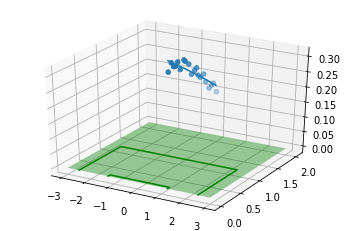

In [116]:
plotPolynom(dataset2,Xline2g2a3,Yline2g2a3,Zline2g2a3)

In [117]:
grau = 1
thetaXg1a4 = []
for i in range(grau+1):
    thetaXg1a4.append(random.uniform(-1,1))
polynomialRegression(1,x,dataset[0],thetaXg1a4,err,grau)

50000
0.000358655526315789


In [118]:
grau = 1
thetaYg1a4 = []
for i in range(grau+1):
    thetaYg1a4.append(random.uniform(0,2))
polynomialRegression(1,x,dataset[1],thetaYg1a4,err,grau)

50000
5.738795112781915e-05


In [119]:
grau = 1
thetaZg1a4 = []
for i in range(grau+1):
    thetaZg1a4.append(random.random())
polynomialRegression(1,x,dataset[2],thetaZg1a4,err,grau)

50000
9.727548872180453e-05


In [120]:
Xlineg1a4 = []
Ylineg1a4 = []
Zlineg1a4 = []
for i in x:
    Xlineg1a4.append(generalH(thetaXg1a4,i))
    Ylineg1a4.append(generalH(thetaYg1a4,i))
    Zlineg1a4.append(generalH(thetaZg1a4,i))

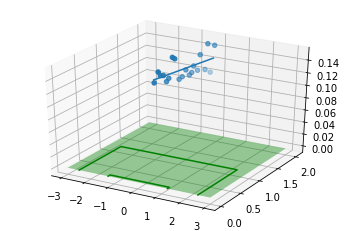

In [121]:
plotPolynom(dataset,Xlineg1a4,Ylineg1a4,Zlineg1a4)

In [122]:
grau = 1
theta2Xg2a4 = []
for i in range(grau+1):
    theta2Xg2a4.append(random.uniform(-1,1))
polynomialRegression(1,x,dataset2[0],theta2Xg2a4,err,grau)

50000
0.00012339221804511284


In [123]:
grau = 1
theta2Yg2a4 = []
for i in range(grau+1):
    theta2Yg2a4.append(random.uniform(0,2))
polynomialRegression(1,x,dataset2[1],theta2Yg2a4,err,grau)

50000
5.738795112781915e-05


In [124]:
grau = 2
theta2Zg2a4 = []
for i in range(grau+1):
    theta2Zg2a4.append(random.random())
polynomialRegression(1,x,dataset2[2],theta2Zg2a4,err,grau)

50000
7.073729308893265e-05


In [125]:
Xline2g2a4 = []
Yline2g2a4 = []
Zline2g2a4 = []
for i in x:
    Xline2g2a4.append(generalH(theta2Xg2a4,i))
    Yline2g2a4.append(generalH(theta2Yg2a4,i))
    Zline2g2a4.append(generalH(theta2Zg2a4,i))

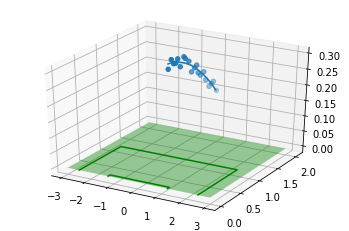

In [126]:
plotPolynom(dataset2,Xline2g2a4,Yline2g2a4,Zline2g2a4)

In [127]:
grau = 1
thetaXg1a5 = []
for i in range(grau+1):
    thetaXg1a5.append(random.uniform(-1,1))
polynomialRegression(2,x,dataset[0],thetaXg1a5,err,grau)

C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


50000
nan


In [128]:
grau = 1
thetaYg1a5 = []
for i in range(grau+1):
    thetaYg1a5.append(random.uniform(0,2))
polynomialRegression(2,x,dataset[1],thetaYg1a5,err,grau)

C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


50000
nan


In [129]:
grau = 1
thetaZg1a5 = []
for i in range(grau+1):
    thetaZg1a5.append(random.random())
polynomialRegression(2,x,dataset[2],thetaZg1a5,err,grau)

C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


50000
nan


In [130]:
Xlineg1a5 = []
Ylineg1a5 = []
Zlineg1a5 = []
for i in x:
    Xlineg1a5.append(generalH(thetaXg1a5,i))
    Ylineg1a5.append(generalH(thetaYg1a5,i))
    Zlineg1a5.append(generalH(thetaZg1a5,i))

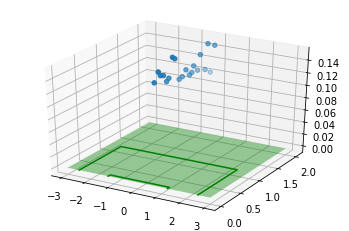

In [131]:
plotPolynom(dataset,Xlineg1a5,Ylineg1a5,Zlineg1a5)

In [132]:
grau = 1
theta2Xg2a5 = []
for i in range(grau+1):
    theta2Xg2a5.append(random.uniform(-1,1))
polynomialRegression(2,x,dataset2[0],theta2Xg2a5,err,grau)

C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


50000
nan


In [133]:
grau = 1
theta2Yg2a5 = []
for i in range(grau+1):
    theta2Yg2a5.append(random.uniform(0,2))
polynomialRegression(2,x,dataset2[1],theta2Yg2a5,err,grau)

C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


50000
nan


In [134]:
grau = 2
theta2Zg2a5 = []
for i in range(grau+1):
    theta2Zg2a5.append(random.random())
polynomialRegression(2,x,dataset2[2],theta2Zg2a5,err,grau)

C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\Gabriel de Freitas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


50000
nan


In [135]:
Xline2g2a5 = []
Yline2g2a5 = []
Zline2g2a5 = []
for i in x:
    Xline2g2a5.append(generalH(theta2Xg2a5,i))
    Yline2g2a5.append(generalH(theta2Yg2a5,i))
    Zline2g2a5.append(generalH(theta2Zg2a5,i))

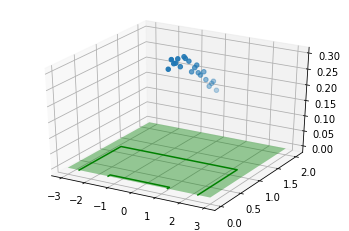

In [136]:
plotPolynom(dataset2,Xline2g2a5,Yline2g2a5,Zline2g2a5)

In [137]:
print(Xlineg1a5)
print(Ylineg1a5)
print(Zlineg1a5)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Percebeu-se que para taxas muito baixas, a curva não se aproximava do formato dos dados, mostrando que precisaria de muito mais épocas para obter um bom resultado. Conforme a taxa foi sendo aumentada, melhor o resultado ia ficando, até não se alterar muito para o limite de épocas pré-estabelecido, o que aconteceu para a regressão linear. Porém, também se percebeu que há um limite, para a taxa = 2 o resultado diveregiu, mostrando que aumentar demais a taxa de aprendizado pode ter também um resultado oposto do desejado. Os erros serão discutidos na próxima seção.

### Avaliação do erro

Os resultados ficaram nas seguintes variáveis: 

Variável   | Resultado
---------  | ---------
Dlinen     | Resultado regressão linear na dimensão D e chute n
Dlinengm   | Resultado regressão polinomial na dimensão D, chute n e grau m
Dline2g2t  | Resultado de teste para regressão polinomial de grau 2
Dlinengmas | Resultado regressão polinomial na dimensão D, chute n, grau m e learning rate a = s  

**Tabela 1:** Explicação dos nomes dos resultados

Os erros serão calculados para comparar os resultados para o mesmo chute com diferentes graus de polinômio e também para dado o mesmo polinômio como muda variando a taxa de aprendizado.

#### Efeito do grau

In [210]:
Xrmse = rmse(Xline,dataset[0])
Yrmse = rmse(Yline,dataset[1])
Zrmse = rmse(Zline, dataset[2])
Xrse = rse(Xline,dataset[0])
Yrse = rse(Yline,dataset[1])
Zrse = rse(Zline, dataset[2])
print("RMSE regressão Linear Chute 1:")
print("X:",Xrmse)
print("Y:", Yrmse)
print("Z", Zrmse)
print("RSE regressão Linear Chute 1:")
print("X:", Xrse)
print("Y:", Yrse)
print("Z:", Zrse)

RMSE regressão Linear Chute 1:
X: 0.02678414732610181
Y: 0.010713942535297168
Z 0.013948922160302222
RSE regressão Linear Chute 1:
X: 0.008708435433654927
Y: 0.001385453057651601
Z: 0.9601876699278054


In [211]:
Xrmseg1 = rmse(Xlineg1,dataset[0])
Yrmseg1 = rmse(Ylineg1,dataset[1])
Zrmseg1 = rmse(Zlineg1, dataset[2])
Xrseg1 = rse(Xlineg1,dataset[0])
Yrseg1 = rse(Ylineg1,dataset[1])
Zrseg1 = rse(Zlineg1, dataset[2])
print("RMSE regressão Polinomial grau 1 Chute 1:")
print("X:",Xrmseg1)
print("Y:", Yrmseg1)
print("Z", Zrmseg1)
print("RSE regressão Polinomial grau 1 Chute 1:")
print("X:", Xrseg1)
print("Y:", Yrseg1)
print("Z:", Zrseg1)

RMSE regressão Polinomial grau 1 Chute 1:
X: 0.02678266328488595
Y: 0.010713351588351735
Z 0.013948153191143588
RSE regressão Polinomial grau 1 Chute 1:
X: 0.008707470436045117
Y: 0.0013853002275107796
Z: 0.9600818073608819


In [212]:
Xrmseg2 = rmse(Xlineg2,dataset[0])
Yrmseg2 = rmse(Ylineg2,dataset[1])
Zrmseg2 = rmse(Zlineg2, dataset[2])
Xrseg2 = rse(Xlineg2,dataset[0])
Yrseg2 = rse(Ylineg2,dataset[1])
Zrseg2 = rse(Zlineg2, dataset[2])
print("RMSE regressão Polinomial grau 2 Chute 1:")
print("X:",Xrmseg2)
print("Y:", Yrmseg2)
print("Z", Zrmseg2)
print("RSE regressão Polinomial grau 2 Chute 1:")
print("X:",Xrseg2)
print("Y:", Yrseg2)
print("Z:", Zrseg2)

RMSE regressão Polinomial grau 2 Chute 1:
X: 0.022968348264047162
Y: 0.010874421430708645
Z 0.01359550300841479
RSE regressão Polinomial grau 2 Chute 1:
X: 0.006403892238532679
Y: 0.001427267936986811
Z: 0.912148154618119


In [213]:
Xrmseg5 = rmse(Xlineg5,dataset[0])
Yrmseg5 = rmse(Ylineg5,dataset[1])
Zrmseg5 = rmse(Zlineg5, dataset[2])
Xrseg5 = rse(Xlineg5,dataset[0])
Yrseg5 = rse(Ylineg5,dataset[1])
Zrseg5 = rse(Zlineg5, dataset[2])
print("RMSE regressão Polinomial grau 5 Chute 1:")
print("X:",Xrmseg5)
print("Y:", Yrmseg5)
print("Z", Zrmseg5)
print("RSE regressão Polinomial grau 5 Chute 1:")
print("X:",Xrseg5)
print("Y:", Yrseg5)
print("Z:", Zrseg5)

RMSE regressão Polinomial grau 5 Chute 1:
X: 0.022885724548009276
Y: 0.01067697862990125
Z 0.013796668519772392
RSE regressão Polinomial grau 5 Chute 1:
X: 0.006357901844993323
Y: 0.0013759097147811813
Z: 0.9393410098918207


In [214]:
Xrmseg10 = rmse(Xlineg10,dataset[0])
Yrmseg10 = rmse(Ylineg10,dataset[1])
Zrmseg10 = rmse(Zlineg10, dataset[2])
Xrseg10 = rse(Xlineg10,dataset[0])
Yrseg10 = rse(Ylineg10,dataset[1])
Zrseg10 = rse(Zlineg10, dataset[2])
print("RMSE regressão Polinomial grau 10 Chute 1:")
print("X:",Xrmseg10)
print("Y:", Yrmseg10)
print("Z", Zrmseg10)
print("RSE regressão Polinomial grau 10 Chute 1:")
print("X:",Xrseg10)
print("Y:", Yrseg10)
print("Z:", Zrseg10)

RMSE regressão Polinomial grau 10 Chute 1:
X: 0.02284420430830614
Y: 0.010675234971181276
Z 0.013717227567704972
RSE regressão Polinomial grau 10 Chute 1:
X: 0.006334853228392505
Y: 0.0013754603515005789
Z: 0.928554738177089


In [215]:
Xrmse2 = rmse(Xline2,dataset2[0])
Yrmse2 = rmse(Yline2,dataset2[1])
Zrmse2 = rmse(Zline2,dataset2[2])
Xrse2 = rse(Xline2,dataset2[0])
Yrse2 = rse(Yline2,dataset2[1])
Zrse2 = rse(Zline2,dataset2[2])
print("RMSE regressão Linear Chute 2:")
print("X:",Xrmse2)
print("Y:", Yrmse2)
print("Z", Zrmse2)
print("RSE regressão Linear Chute 2:")
print("X:", Xrse2)
print("Y:", Yrse2)
print("Z:", Zrse2)

RMSE regressão Linear Chute 2:
X: 0.015710238095851564
Y: 0.010713943782485675
Z 0.01708865589501979
RSE regressão Linear Chute 2:
X: 0.012182053982937322
Y: 0.001385453380207229
Z: 0.13821833066623496


In [216]:
Xrmse2g1 = rmse(Xline2g1,dataset2[0])
Yrmse2g1 = rmse(Yline2g1,dataset2[1])
Zrmse2g1 = rmse(Zline2g1,dataset2[2])
Xrse2g1 = rse(Xline2g1,dataset2[0])
Yrse2g1 = rse(Yline2g1,dataset2[1])
Zrse2g1 = rse(Zline2g1,dataset2[2])
print("RMSE regressão Polinomial grau 1 Chute 2:")
print("X:", Xrmse2g1)
print("Y:", Yrmse2g1)
print("Z:", Zrmse2g1)
print("RSE regressão Polinomial grau 1 Chute 2:")
print("X:", Xrse2g1)
print("Y:", Yrse2g1)
print("Z:", Zrse2g1)

RMSE regressão Polinomial grau 1 Chute 2:
X: 0.01570937414699343
Y: 0.010713351588351735
Z: 0.01708771488526186
RSE regressão Polinomial grau 1 Chute 2:
X: 0.012180714171003998
Y: 0.0013853002275107796
Z: 0.138203108729813


In [217]:
Xrmse2g2 = rmse(Xline2g2,dataset2[0])
Yrmse2g2 = rmse(Yline2g2,dataset2[1])
Zrmse2g2 = rmse(Zline2g2,dataset2[2])
Xrse2g2 = rse(Xline2g2,dataset2[0])
Yrse2g2 = rse(Yline2g2,dataset2[1])
Zrse2g2 = rse(Zline2g2,dataset2[2])
print("RMSE regressão Polinomial grau 2 Chute 2:")
print("X:", Xrmse2g2)
print("Y:", Yrmse2g2)
print("Z:", Zrmse2g2)
print("RSE regressão Polinomial grau 2 Chute 2:")
print("X:", Xrse2g2)
print("Y:", Yrse2g2)
print("Z:", Zrse2g2)

RMSE regressão Polinomial grau 2 Chute 2:
X: 0.01570937414699343
Y: 0.010713351588351735
Z: 0.012412181278721408
RSE regressão Polinomial grau 2 Chute 2:
X: 0.012180714171003998
Y: 0.0013853002275107796
Z: 0.07291989818807731


In [218]:
Xrmse2g2t = rmse(Xline2g2t,dataset2[0])
Yrmse2g2t = rmse(Yline2g2t,dataset2[1])
Zrmse2g2t = rmse(Zline2g2t,dataset2[2])
Xrse2g2t = rse(Xline2g2t,dataset2[0])
Yrse2g2t = rse(Yline2g2t,dataset2[1])
Zrse2g2t = rse(Zline2g2t,dataset2[2])
print("Polinomial em todas as dimensões:")
print("RMSE regressão Polinomial grau 2 Chute 2:")
print("X:", Xrmse2g2t)
print("Y:", Yrmse2g2t)
print("Z:", Zrmse2g2t)
print("RSE regressão Polinomial grau 2 Chute 2:")
print("X:", Xrse2g2t)
print("Y:", Yrse2g2t)
print("Z:", Zrse2g2t)

Polinomial em todas as dimensões:
RMSE regressão Polinomial grau 2 Chute 2:
X: 0.014241740438348622
Y: 0.010765564584754804
Z: 0.012179130392046203
RSE regressão Polinomial grau 2 Chute 2:
X: 0.010011084295724457
Y: 0.0013988360350421399
Z: 0.0702073198595503


In [219]:
Xrmse2g5 = rmse(Xline2g5,dataset2[0])
Yrmse2g5 = rmse(Yline2g5,dataset2[1])
Zrmse2g5 = rmse(Zline2g5,dataset2[2])
Xrse2g5 = rse(Xline2g5,dataset2[0])
Yrse2g5 = rse(Yline2g5,dataset2[1])
Zrse2g5 = rse(Zline2g5,dataset2[2])
print("RMSE regressão Polinomial grau 5 Chute 2:")
print("X:", Xrmse2g5)
print("Y:", Yrmse2g5)
print("Z:", Zrmse2g5)
print("RSE regressão Polinomial grau 5 Chute 2:")
print("X:", Xrse2g5)
print("Y:", Yrse2g5)
print("Z:", Zrse2g5)

RMSE regressão Polinomial grau 5 Chute 2:
X: 0.01570937414699343
Y: 0.010713351588351735
Z: 0.012011885436764638
RSE regressão Polinomial grau 5 Chute 2:
X: 0.012180714171003998
Y: 0.0013853002275107796
Z: 0.06829237194284178


In [220]:
Xrmse2g10 = rmse(Xline2g10,dataset2[0])
Yrmse2g10 = rmse(Yline2g10,dataset2[1])
Zrmse2g10 = rmse(Zline2g10,dataset2[2])
Xrse2g10 = rse(Xline2g10,dataset2[0])
Yrse2g10 = rse(Yline2g10,dataset2[1])
Zrse2g10 = rse(Zline2g10,dataset2[2])
print("RMSE regressão Polinomial grau 10 Chute 2:")
print("X:", Xrmse2g10)
print("Y:", Yrmse2g10)
print("Z:", Zrmse2g10)
print("RSE regressão Polinomial grau 10 Chute 2:")
print("X:", Xrse2g10)
print("Y:", Yrse2g10)
print("Z:", Zrse2g10)

RMSE regressão Polinomial grau 10 Chute 2:
X: 0.01570937414699343
Y: 0.010713351588351735
Z: 0.01236136486303524
RSE regressão Polinomial grau 10 Chute 2:
X: 0.012180714171003998
Y: 0.0013853002275107796
Z: 0.07232404119591541


Percebeu-se que conforme aumenta-se o grau, o erro diminuiu no geral, em ambos os datasets, porém foi uma redução pequena, o que pode-se explicar por todos os graus terem obtido uma curva semelhante para o mesmo dataset, na região dos pontos, divergindo entre si fora dessa região, isso pode ter se dado devido à quantidade reduzida de dados. Como não foi usada validação cruzada, nem havia um conjunto de testes, não é possível averiguar o efeito de overfit nos dados, porém é possível inferir que para graus maiores justamente por os polinômios diferirem-se entre si externamente aos dados fornecidos, como mostrado anteriormente. A diferença no erro observada entre a regr

### Efeito da taxa de aprendizagem

In [221]:
Xrmseg1a1 = rmse(Xlineg1a1,dataset[0])
Yrmseg1a1 = rmse(Ylineg1a1,dataset[1])
Zrmseg1a1 = rmse(Zlineg1a1,dataset[2])
Xrseg1a1 = rse(Xlineg1a1,dataset[0])
Yrseg1a1 = rse(Ylineg1a1,dataset[1])
Zrseg1a1 = rse(Zlineg1a1,dataset[2])
print("RMSE regressão Polinomial grau 1 Chute 1 learning rate 0.001:")
print("X:", Xrmseg1a1)
print("Y:", Yrmseg1a1)
print("Z:", Zrmseg1a1)
print("RSE regressão Polinomial grau 1 Chute 1 learning rate 0.001:")
print("X:", Xrseg1a1)
print("Y:", Yrseg1a1)
print("Z:", Zrseg1a1)

RMSE regressão Polinomial grau 1 Chute 1 learning rate 0.001:
X: 0.2005584462004407
Y: 0.2118186574150645
Z: 0.020176663678748666
RSE regressão Polinomial grau 1 Chute 1 learning rate 0.001:
X: 0.4882771472704578
Y: 0.5415288667367101
Z: 2.0089703770496237


In [222]:
Xrmseg1a2 = rmse(Xlineg1a2,dataset[0])
Yrmseg1a2 = rmse(Ylineg1a2,dataset[1])
Zrmseg1a2 = rmse(Zlineg1a2,dataset[2])
Xrseg1a2 = rse(Xlineg1a2,dataset[0])
Yrseg1a2 = rse(Ylineg1a2,dataset[1])
Zrseg1a2 = rse(Zlineg1a2,dataset[2])
print("RMSE regressão Polinomial grau 1 Chute 1 learning rate 0.01:")
print("X:", Xrmseg1a2)
print("Y:", Yrmseg1a2)
print("Z:", Zrmseg1a2)
print("RSE regressão Polinomial grau 1 Chute 1 learning rate 0.01:")
print("X:", Xrseg1a2)
print("Y:", Yrseg1a2)
print("Z:", Zrseg1a2)

RMSE regressão Polinomial grau 1 Chute 1 learning rate 0.01:
X: 0.026936316435669527
Y: 0.01132710049749726
Z: 0.013980159686658626
RSE regressão Polinomial grau 1 Chute 1 learning rate 0.01:
X: 0.008807667203769031
Y: 0.0015485694865072807
Z: 0.9644930165045159


In [223]:
Xrmseg1a3 = rmse(Xlineg1a3,dataset[0])
Yrmseg1a3 = rmse(Ylineg1a3,dataset[1])
Zrmseg1a3 = rmse(Zlineg1a3,dataset[2])
Xrseg1a3 = rse(Xlineg1a3,dataset[0])
Yrseg1a3 = rse(Ylineg1a3,dataset[1])
Zrseg1a3 = rse(Zlineg1a3,dataset[2])
print("RMSE regressão Polinomial grau 1 Chute 1 learning rate 0.1:")
print("X:", Xrmseg1a3)
print("Y:", Yrmseg1a3)
print("Z:", Zrmseg1a3)
print("RSE regressão Polinomial grau 1 Chute 1 learning rate 0.1:")
print("X:", Xrseg1a3)
print("Y:", Yrseg1a3)
print("Z:", Zrseg1a3)

RMSE regressão Polinomial grau 1 Chute 1 learning rate 0.1:
X: 0.026936316435669527
Y: 0.01132710049749726
Z: 0.013980159686658626
RSE regressão Polinomial grau 1 Chute 1 learning rate 0.1:
X: 0.008807667203769031
Y: 0.0015485694865072807
Z: 0.9644930165045159


In [224]:
Xrmseg1a4 = rmse(Xlineg1a4,dataset[0])
Yrmseg1a4 = rmse(Ylineg1a4,dataset[1])
Zrmseg1a4 = rmse(Zlineg1a4,dataset[2])
Xrseg1a4 = rse(Xlineg1a4,dataset[0])
Yrseg1a4 = rse(Ylineg1a4,dataset[1])
Zrseg1a4 = rse(Zlineg1a4,dataset[2])
print("RMSE regressão Polinomial grau 1 Chute 1 learning rate 1:")
print("X:", Xrmseg1a4)
print("Y:", Yrmseg1a4)
print("Z:", Zrmseg1a4)
print("RSE regressão Polinomial grau 1 Chute 1 learning rate 1:")
print("X:", Xrseg1a4)
print("Y:", Yrseg1a4)
print("Z:", Zrseg1a4)

RMSE regressão Polinomial grau 1 Chute 1 learning rate 1:
X: 0.026782663284885953
Y: 0.01071335158835172
Z: 0.013948153191143588
RSE regressão Polinomial grau 1 Chute 1 learning rate 1:
X: 0.008707470436045119
Y: 0.0013853002275107753
Z: 0.9600818073608819


Para taxa de aprendizado 2 os resultados divergiram

In [225]:
Xrmse2g2a1 = rmse(Xline2g2a1,dataset2[0])
Yrmse2g2a1 = rmse(Yline2g2a1,dataset2[1])
Zrmse2g2a1 = rmse(Zline2g2a1,dataset2[2])
Xrse2g2a1 = rse(Xline2g2a1,dataset2[0])
Yrse2g2a1 = rse(Yline2g2a1,dataset2[1])
Zrse2g2a1 = rse(Zline2g2a1,dataset2[2])
print("RMSE regressão Polinomial grau 2 Chute 2 learning rate 0.001:")
print("X:", Xrmse2g2a1)
print("Y:", Yrmse2g2a1)
print("Z:", Zrmse2g2a1)
print("RSE regressão Polinomial grau 2 Chute 2 learning rate 0.001:")
print("X:", Xrse2g2a1)
print("Y:", Yrse2g2a1)
print("Z:", Zrse2g2a1)

RMSE regressão Polinomial grau 2 Chute 2 learning rate 0.001:
X: 0.07853851090913462
Y: 0.2820536258074021
Z: 0.038262668420245824
RSE regressão Polinomial grau 2 Chute 2 learning rate 0.001:
X: 0.30445303741532714
Y: 0.9601886411174818
Z: 0.6929475163471843


In [226]:
Xrmse2g2a2 = rmse(Xline2g2a2,dataset2[0])
Yrmse2g2a2 = rmse(Yline2g2a2,dataset2[1])
Zrmse2g2a2 = rmse(Zline2g2a2,dataset2[2])
Xrse2g2a2 = rse(Xline2g2a2,dataset2[0])
Yrse2g2a2 = rse(Yline2g2a2,dataset2[1])
Zrse2g2a2 = rse(Zline2g2a2,dataset2[2])
print("RMSE regressão Polinomial grau 2 Chute 2 learning rate 0.01:")
print("X:", Xrmse2g2a2)
print("Y:", Yrmse2g2a2)
print("Z:", Zrmse2g2a2)
print("RSE regressão Polinomial grau 2 Chute 2 learning rate 0.01:")
print("X:", Xrse2g2a2)
print("Y:", Yrse2g2a2)
print("Z:", Zrse2g2a2)

RMSE regressão Polinomial grau 2 Chute 2 learning rate 0.01:
X: 0.01578217653293108
Y: 0.011346787989314372
Z: 0.02180036148448758
RSE regressão Polinomial grau 2 Chute 2 learning rate 0.01:
X: 0.012293874615459053
Y: 0.001553957263198715
Z: 0.22494545563827859


In [227]:
Xrmse2g2a3 = rmse(Xline2g2a3,dataset2[0])
Yrmse2g2a3 = rmse(Yline2g2a3,dataset2[1])
Zrmse2g2a3 = rmse(Zline2g2a3,dataset2[2])
Xrse2g2a3 = rse(Xline2g2a3,dataset2[0])
Yrse2g2a3 = rse(Yline2g2a3,dataset2[1])
Zrse2g2a3 = rse(Zline2g2a3,dataset2[2])
print("RMSE regressão Polinomial grau 2 Chute 2 learning rate 0.1:")
print("X:", Xrmse2g2a3)
print("Y:", Yrmse2g2a3)
print("Z:", Zrmse2g2a3)
print("RSE regressão Polinomial grau 2 Chute 2 learning rate 0.1:")
print("X:", Xrse2g2a3)
print("Y:", Yrse2g2a3)
print("Z:", Zrse2g2a3)

RMSE regressão Polinomial grau 2 Chute 2 learning rate 0.1:
X: 0.015709374146993426
Y: 0.010713351588351731
Z: 0.016520745946962075
RSE regressão Polinomial grau 2 Chute 2 learning rate 0.1:
X: 0.012180714171003996
Y: 0.0013853002275107788
Z: 0.12918412249572303


In [228]:
Xrmse2g2a4 = rmse(Xline2g2a4,dataset2[0])
Yrmse2g2a4 = rmse(Yline2g2a4,dataset2[1])
Zrmse2g2a4 = rmse(Zline2g2a4,dataset2[2])
Xrse2g2a4 = rse(Xline2g2a4,dataset2[0])
Yrse2g2a4 = rse(Yline2g2a4,dataset2[1])
Zrse2g2a4 = rse(Zline2g2a4,dataset2[2])
print("RMSE regressão Polinomial grau 2 Chute 2 learning rate 1:")
print("X:", Xrmse2g2a4)
print("Y:", Yrmse2g2a4)
print("Z:", Zrmse2g2a4)
print("RSE regressão Polinomial grau 2 Chute 2 learning rate 1:")
print("X:", Xrse2g2a4)
print("Y:", Yrse2g2a4)
print("Z:", Zrse2g2a4)

RMSE regressão Polinomial grau 2 Chute 2 learning rate 1:
X: 0.015709374146993433
Y: 0.01071335158835172
Z: 0.011894308982781022
RSE regressão Polinomial grau 2 Chute 2 learning rate 1:
X: 0.012180714171004007
Y: 0.0013853002275107753
Z: 0.06696197683497666


Para taxa de aprendizado 2 os resultados divergiram

Como discutido anteriormente, conforme a taxa de aprendizado aumenta, o erro diminui, e a redução é significativa em alguns casos. No entanto chega um momento, o que foi observado na regressão linear para o chute 1, em que o erro para de cair, mostrando que pode-se ter conseguido encontrar o mínimo da função erro quadrático médio dentro do limite de épocas. Porém, quando se aumenta demais a taxa de aprendizado, o algoritmo diverge, como observado para a taxa valendo 2.

### Nós defendemos o chute?

In [184]:
x2 = gettingX(1/60,3/4,1/60)
print(len(x2))

45


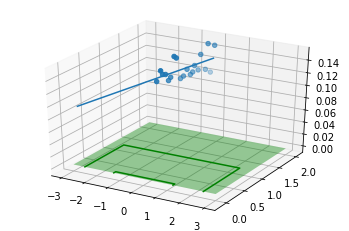

In [185]:
Xkick1 = []
Ykick1 = []
Zkick1 = []
for i in x2:
    Xkick1.append(generalH(thetaX,i))
    Ykick1.append(generalH(thetaY,i))
    Zkick1.append(generalH(thetaZ,i))
plotPolynom(dataset,Xkick1,Ykick1,Zkick1)

Como pode ser observado, para este chute, que pode ser bem aproximado por uma reta, a trajetória da bola a coloca numa posição onde nosso robô consegue pegá-la, x < |3| e y < 2.1 e z < 0.3

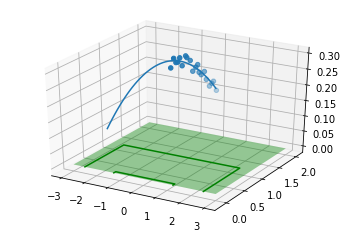

In [186]:
Xkick2 = []
Ykick2 = []
Zkick2 = []
for i in x2:
    Xkick2.append(generalH(theta2Xg2,i))
    Ykick2.append(generalH(theta2Yg2,i))
    Zkick2.append(generalH(theta2Zg2,i))
plotPolynom(dataset2,Xkick2,Ykick2,Zkick2)

Como pode ser observado, para este chute, que pode ser bem aproximado por uma parábola, a trajetória da bola a coloca numa posição onde nosso robô consegue pegá-la, x < |3| e y < 2.1 e z < 0.3